In [1]:
import tempfile  # make a temporary directory for files
import os  # interact with the filesystem
import urllib.request  # grad data from internet
import tarfile  # extract files from tar
from subprocess import Popen, PIPE, STDOUT  # enable calling commandline

import matplotlib.pyplot as plt  # manipulate figures
import seaborn as sns  # display results
import pandas as pd   # manipulate tabular data
import nibabel as nib  # load the beta maps in python
from nilearn import plotting  # plot nifti images


from nilearn import plotting
from nilearn.image import mean_img

from nilearn.plotting import plot_glass_brain

In [2]:
sub_num = "sub-043"

In [3]:
data_dir1 = '/mnt/chrastil/lab/users/lily/path_direction/localizer_beta_series_all_run_exploration'
data_name_S1 = sub_num+ '_task-boldEx_run-1_space-MNI152NLin2009cAsym_desc-S_betaseries.nii.gz'
data_name_E1 = sub_num+  '_task-boldEx_run-1_space-MNI152NLin2009cAsym_desc-E_betaseries.nii.gz'
data_name_W1 = sub_num+  '_task-boldEx_run-1_space-MNI152NLin2009cAsym_desc-W_betaseries.nii.gz'
data_name_N1 = sub_num+  '_task-boldEx_run-1_space-MNI152NLin2009cAsym_desc-N_betaseries.nii.gz'

data_name_S2 = sub_num+  '_task-boldEx2_run-1_space-MNI152NLin2009cAsym_desc-S_betaseries.nii.gz'
data_name_E2 = sub_num+  '_task-boldEx2_run-1_space-MNI152NLin2009cAsym_desc-E_betaseries.nii.gz'
data_name_W2 = sub_num+  '_task-boldEx2_run-1_space-MNI152NLin2009cAsym_desc-W_betaseries.nii.gz'
data_name_N2 = sub_num+  '_task-boldEx2_run-1_space-MNI152NLin2009cAsym_desc-N_betaseries.nii.gz'

In [4]:
data_dir2 = '/mnt/chrastil/lab/users/lily/path_direction/localizer_beta_series_all_run_exploration'
data_name_S3 = sub_num+  '_task-boldRun1_run-1_space-MNI152NLin2009cAsym_desc-S_betaseries.nii.gz'
data_name_E3 = sub_num+  '_task-boldRun1_run-1_space-MNI152NLin2009cAsym_desc-E_betaseries.nii.gz'
data_name_W3 = sub_num+  '_task-boldRun1_run-1_space-MNI152NLin2009cAsym_desc-W_betaseries.nii.gz'
data_name_N3 = sub_num+  '_task-boldRun1_run-1_space-MNI152NLin2009cAsym_desc-N_betaseries.nii.gz'

data_name_S4 = sub_num+  '_task-boldRun2_run-1_space-MNI152NLin2009cAsym_desc-S_betaseries.nii.gz'
data_name_E4 = sub_num+  '_task-boldRun2_run-1_space-MNI152NLin2009cAsym_desc-E_betaseries.nii.gz'
data_name_W4 = sub_num+  '_task-boldRun2_run-1_space-MNI152NLin2009cAsym_desc-W_betaseries.nii.gz'
data_name_N4 = sub_num+  '_task-boldRun2_run-1_space-MNI152NLin2009cAsym_desc-N_betaseries.nii.gz'

data_name_S5 = sub_num+  '_task-boldRun3_run-1_space-MNI152NLin2009cAsym_desc-S_betaseries.nii.gz'
data_name_E5 = sub_num+  '_task-boldRun3_run-1_space-MNI152NLin2009cAsym_desc-E_betaseries.nii.gz'
data_name_W5 = sub_num+  '_task-boldRun3_run-1_space-MNI152NLin2009cAsym_desc-W_betaseries.nii.gz'
data_name_N5 = sub_num+  '_task-boldRun3_run-1_space-MNI152NLin2009cAsym_desc-N_betaseries.nii.gz'

data_name_S6 = sub_num+  '_task-boldRun4_run-2_space-MNI152NLin2009cAsym_desc-S_betaseries.nii.gz'
data_name_E6 = sub_num+  '_task-boldRun4_run-2_space-MNI152NLin2009cAsym_desc-E_betaseries.nii.gz'
data_name_W6 = sub_num+  '_task-boldRun4_run-2_space-MNI152NLin2009cAsym_desc-W_betaseries.nii.gz'
data_name_N6 = sub_num+  '_task-boldRun4_run-2_space-MNI152NLin2009cAsym_desc-N_betaseries.nii.gz'

data_name_S7 = sub_num+  '_task-boldRun5_run-1_space-MNI152NLin2009cAsym_desc-S_betaseries.nii.gz'
data_name_E7 = sub_num+  '_task-boldRun5_run-1_space-MNI152NLin2009cAsym_desc-E_betaseries.nii.gz'
data_name_W7 = sub_num+  '_task-boldRun5_run-1_space-MNI152NLin2009cAsym_desc-W_betaseries.nii.gz'
data_name_N7 = sub_num+  '_task-boldRun5_run-1_space-MNI152NLin2009cAsym_desc-N_betaseries.nii.gz'

data_name_S8 = sub_num+  '_task-boldRun6_run-1_space-MNI152NLin2009cAsym_desc-S_betaseries.nii.gz'
data_name_E8 = sub_num+ '_task-boldRun6_run-1_space-MNI152NLin2009cAsym_desc-E_betaseries.nii.gz'
data_name_W8 = sub_num+  '_task-boldRun6_run-1_space-MNI152NLin2009cAsym_desc-W_betaseries.nii.gz'
data_name_N8 = sub_num+  '_task-boldRun6_run-1_space-MNI152NLin2009cAsym_desc-N_betaseries.nii.gz'


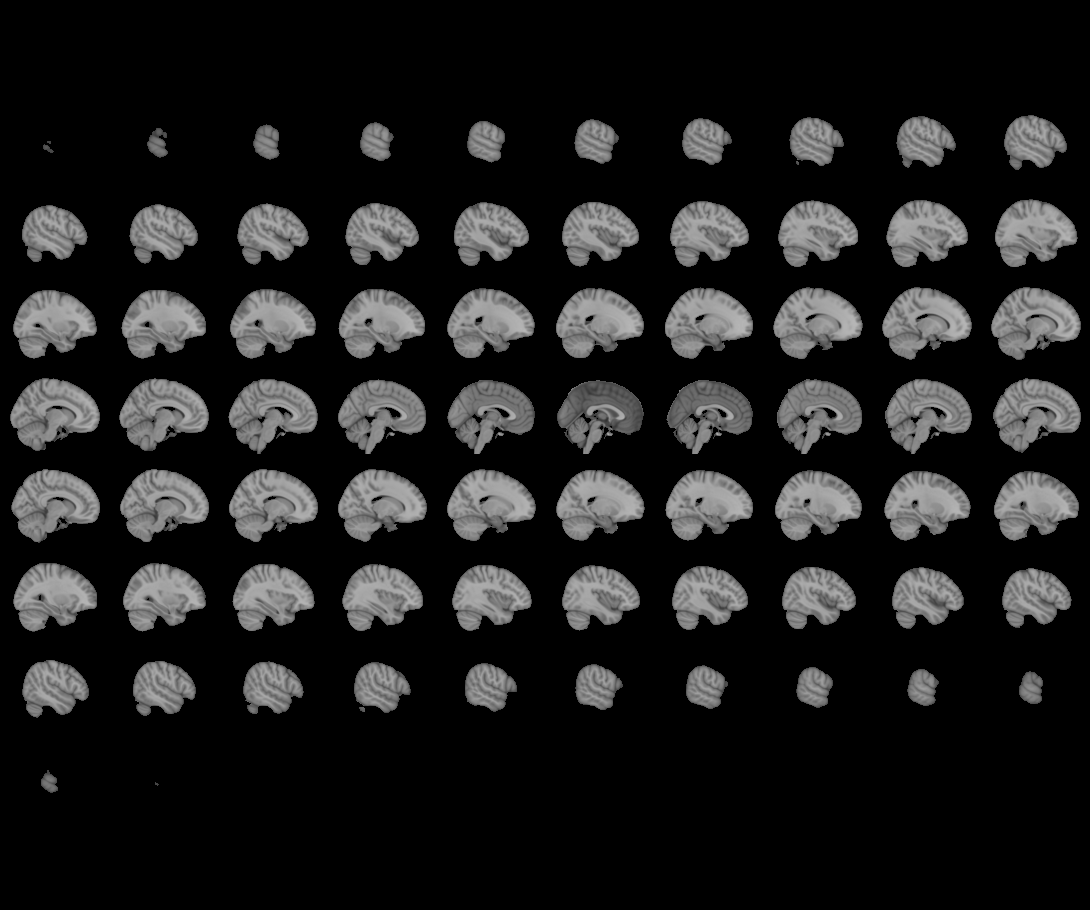
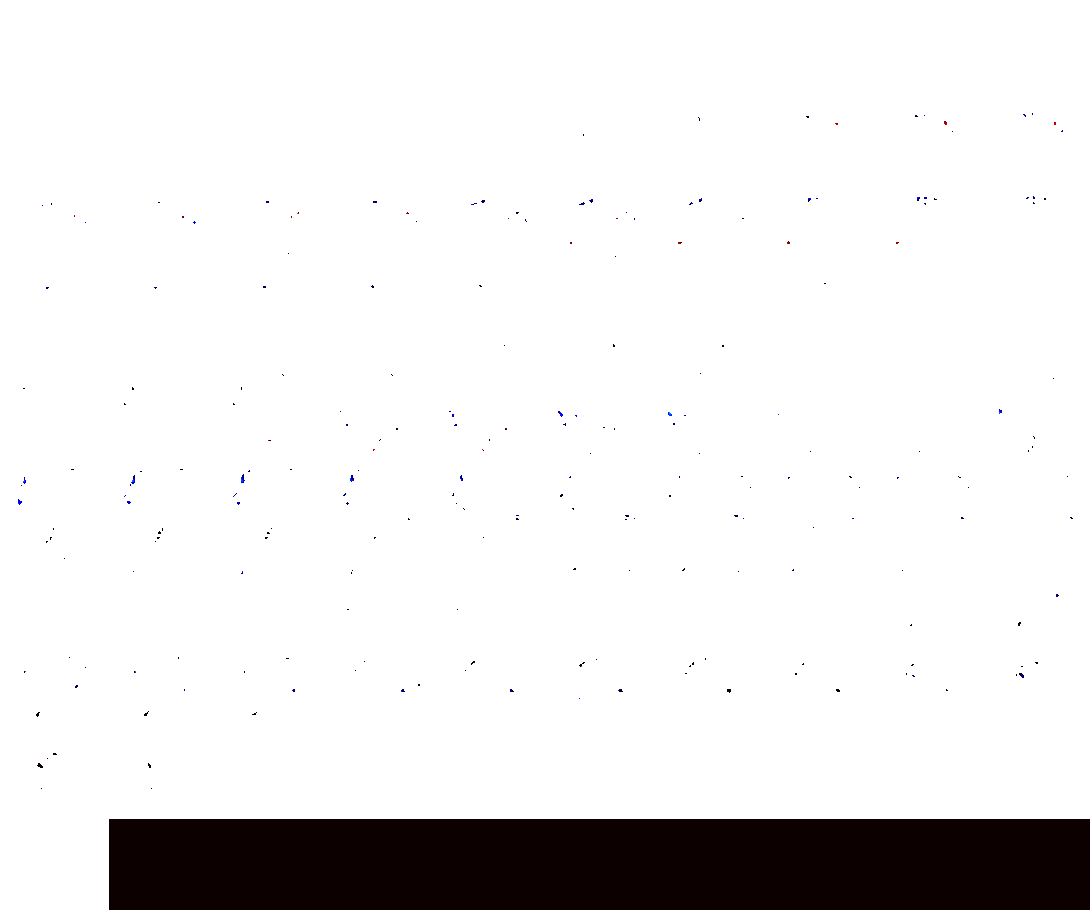

In [825]:
S_path1 = os.path.join(data_dir1, "derivatives","nibetaseries",sub_num,"func",data_name_S1)
E_path1 = os.path.join(data_dir1, "derivatives","nibetaseries",sub_num,"func",data_name_E1)
W_path1 = os.path.join(data_dir1, "derivatives","nibetaseries",sub_num,"func",data_name_W1)
N_path1 = os.path.join(data_dir1, "derivatives","nibetaseries",sub_num,"func",data_name_N1)

S_path2 = os.path.join(data_dir1, "derivatives","nibetaseries",sub_num,"func",data_name_S2)
E_path2 = os.path.join(data_dir1, "derivatives","nibetaseries",sub_num,"func",data_name_E2)
W_path2 = os.path.join(data_dir1, "derivatives","nibetaseries",sub_num,"func",data_name_W2)
N_path2 = os.path.join(data_dir1, "derivatives","nibetaseries",sub_num,"func",data_name_N2)

S_path3 = os.path.join(data_dir2, "derivatives","nibetaseries",sub_num,"func",data_name_S3)
E_path3 = os.path.join(data_dir2, "derivatives","nibetaseries",sub_num,"func",data_name_E3)
W_path3 = os.path.join(data_dir2, "derivatives","nibetaseries",sub_num,"func",data_name_W3)
N_path3 = os.path.join(data_dir2, "derivatives","nibetaseries",sub_num,"func",data_name_N3)

S_path4 = os.path.join(data_dir2, "derivatives","nibetaseries",sub_num,"func",data_name_S4)
E_path4 = os.path.join(data_dir2, "derivatives","nibetaseries",sub_num,"func",data_name_E4)
W_path4 = os.path.join(data_dir2, "derivatives","nibetaseries",sub_num,"func",data_name_W4)
N_path4 = os.path.join(data_dir2, "derivatives","nibetaseries",sub_num,"func",data_name_N4)

S_path5 = os.path.join(data_dir2, "derivatives","nibetaseries",sub_num,"func",data_name_S5)
E_path5 = os.path.join(data_dir2, "derivatives","nibetaseries",sub_num,"func",data_name_E5)
W_path5 = os.path.join(data_dir2, "derivatives","nibetaseries",sub_num,"func",data_name_W5)
N_path5 = os.path.join(data_dir2, "derivatives","nibetaseries",sub_num,"func",data_name_N5)

S_path6 = os.path.join(data_dir2, "derivatives","nibetaseries",sub_num,"func",data_name_S6)
E_path6= os.path.join(data_dir2, "derivatives","nibetaseries",sub_num,"func",data_name_E6)
W_path6 = os.path.join(data_dir2, "derivatives","nibetaseries",sub_num,"func",data_name_W6)
N_path6 = os.path.join(data_dir2, "derivatives","nibetaseries",sub_num,"func",data_name_N6)

S_path7 = os.path.join(data_dir2, "derivatives","nibetaseries",sub_num,"func",data_name_S7)
E_path7 = os.path.join(data_dir2, "derivatives","nibetaseries",sub_num,"func",data_name_E7)
W_path7 = os.path.join(data_dir2, "derivatives","nibetaseries",sub_num,"func",data_name_W7)
N_path7 = os.path.join(data_dir2, "derivatives","nibetaseries",sub_num,"func",data_name_N7)

S_path8 = os.path.join(data_dir2, "derivatives","nibetaseries",sub_num,"func",data_name_S8)
E_path8 = os.path.join(data_dir2, "derivatives","nibetaseries",sub_num,"func",data_name_E8)
W_path8 = os.path.join(data_dir2, "derivatives","nibetaseries",sub_num,"func",data_name_W8)
N_path8 = os.path.join(data_dir2, "derivatives","nibetaseries",sub_num,"func",data_name_N8)



In [ ]:
plotting.view_img(mean_img(S_path6), threshold= 2)

# EXPLORE1

## EXPLORE1 EAST

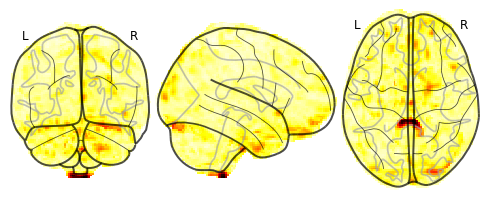

In [826]:
plot_glass_brain(mean_img(E_path1))

## EXPLORE1 SOUTH

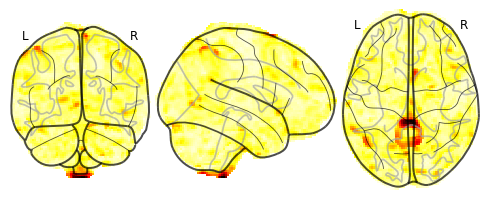

In [827]:
plot_glass_brain(mean_img(S_path1))

## EXPLORE1 WEST

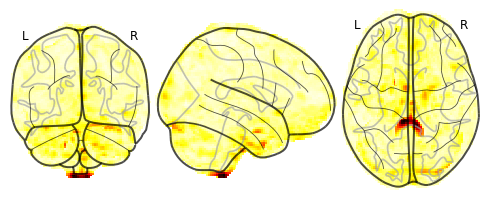

In [828]:
plot_glass_brain(mean_img(W_path1))

## EXPLORE1 NORTH

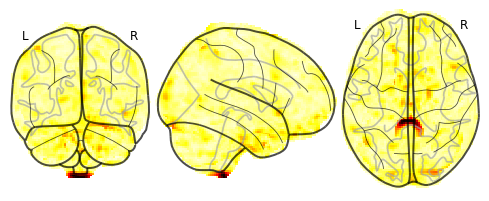

In [829]:
plot_glass_brain(mean_img(N_path1))

# EXPLORE2

## EXPLORE2 EAST

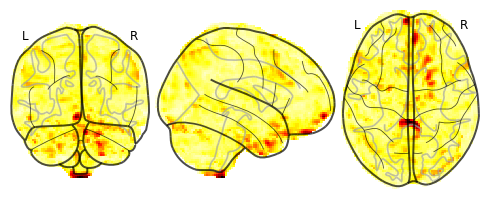

In [830]:
plot_glass_brain(mean_img(E_path2))

## EXPLORE2 SOUTH

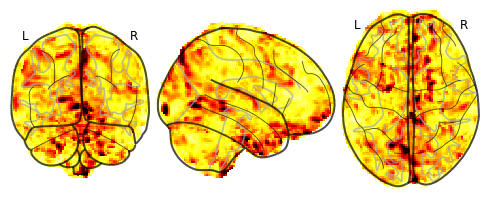

In [831]:
plot_glass_brain(mean_img(S_path2))

## EXPLORE2 WEST

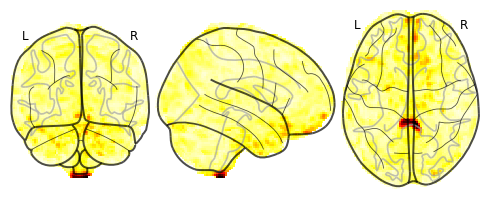

In [832]:
plot_glass_brain(mean_img(W_path2))

## EXPLORE2 NORTH

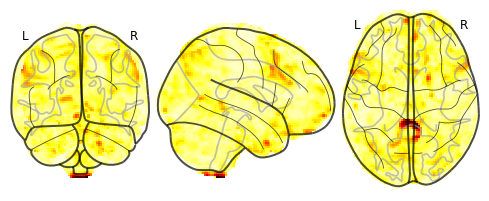

In [833]:
plot_glass_brain(mean_img(N_path2))

# Run 1

## Run1 EAST

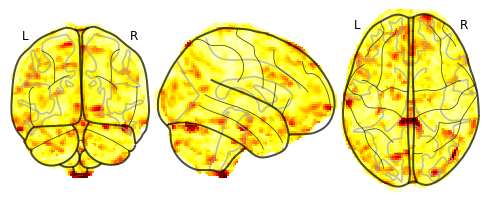

In [834]:
plot_glass_brain(mean_img(E_path3))

## Run1 SOUTH

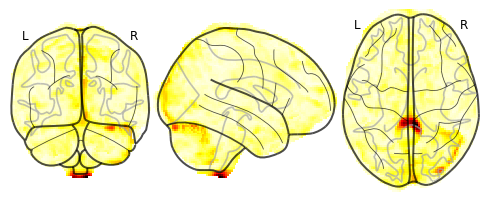

In [835]:
plot_glass_brain(mean_img(S_path3))

## Run1 WEST

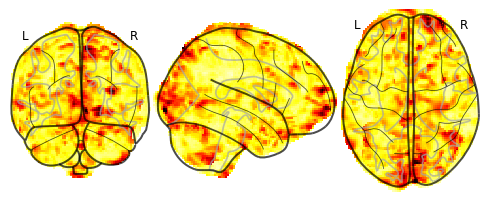

In [836]:
plot_glass_brain(mean_img(W_path3))

## Run1 NORTH

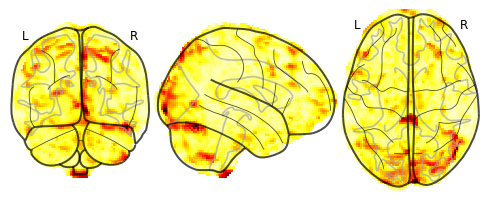

In [837]:
plot_glass_brain(mean_img(N_path3))

# Run 2

## Run2 EAST

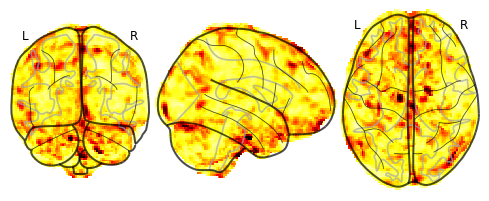

In [838]:
plot_glass_brain(mean_img(E_path4))

## Run2 SOUTH

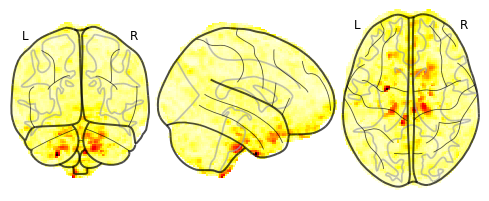

In [839]:
plot_glass_brain(mean_img(S_path4))

## Run2 WEST

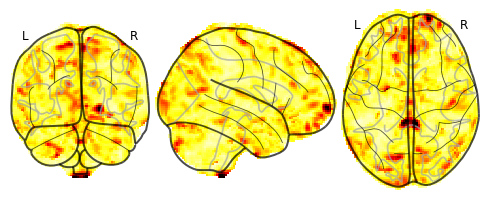

In [840]:
plot_glass_brain(mean_img(W_path4))

## Run2 NORTH

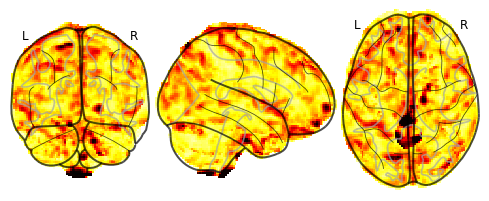

In [841]:
plot_glass_brain(mean_img(N_path4))

# Run 3

## Run3 EAST

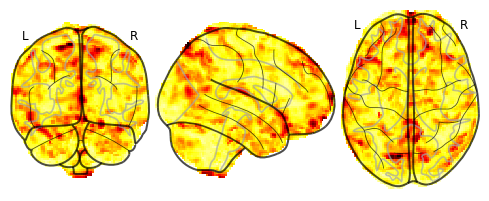

In [842]:
plot_glass_brain(mean_img(E_path5))

## Run3 SOUTH

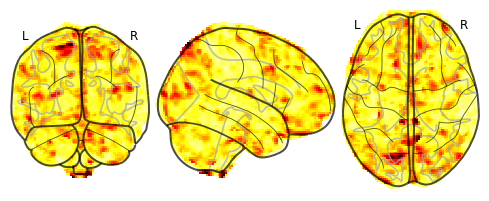

In [843]:
plot_glass_brain(mean_img(S_path5))

## Run3 WEST

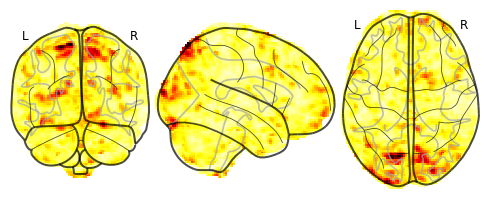

In [844]:
plot_glass_brain(mean_img(W_path5))

## Run3 NORTH

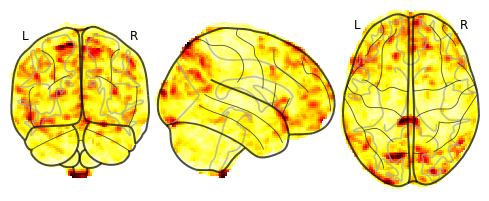

In [845]:
plot_glass_brain(mean_img(N_path5))

# Run 4

## Run4 EAST

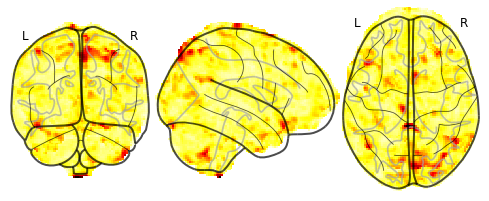

In [846]:
plot_glass_brain(mean_img(E_path6))

## Run4 SOUTH

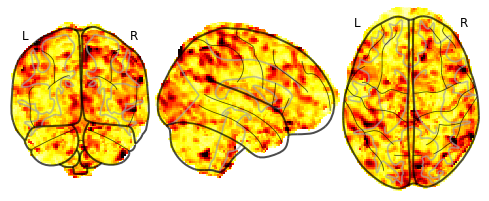

In [847]:
plot_glass_brain(mean_img(S_path6))

## Run4 WEST

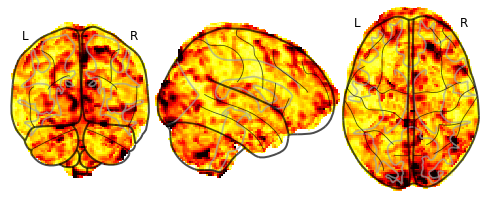

In [848]:
plot_glass_brain(mean_img(W_path6))

## Run4 NORTH

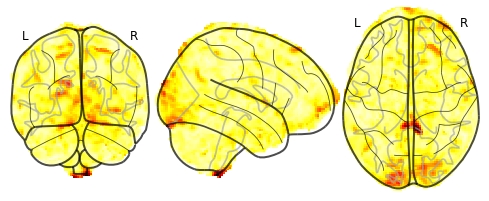

In [849]:
plot_glass_brain(mean_img(N_path6))

# Run 5

## Run5 EAST

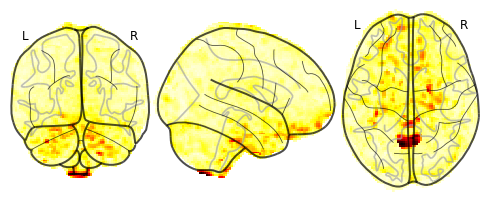

In [850]:
plot_glass_brain(mean_img(E_path7))

## Run5 SOUTH

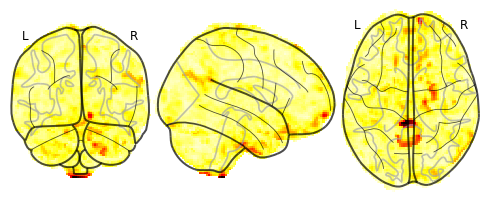

In [851]:
plot_glass_brain(mean_img(S_path7))

## Run5 WEST

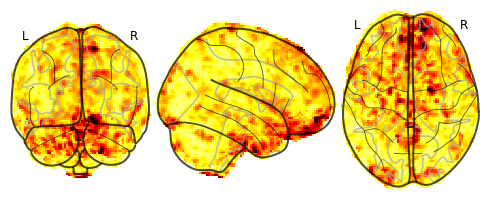

In [852]:
plot_glass_brain(mean_img(W_path7))

## Run5 NORTH

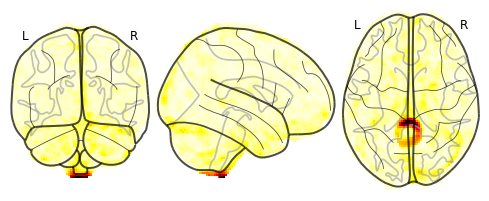

In [853]:
plot_glass_brain(mean_img(N_path7))

# Run 6

## Run6 EAST

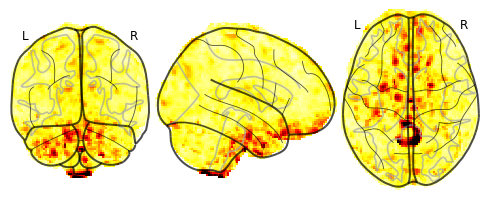

In [854]:
plot_glass_brain(mean_img(E_path8))

## Run6 SOUTH

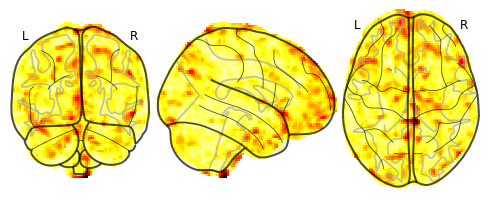

In [855]:
plot_glass_brain(mean_img(S_path8))

## Run6 WEST

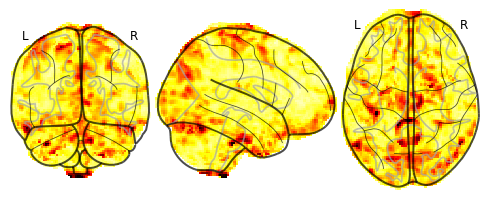

In [856]:
plot_glass_brain(mean_img(W_path8))

## Run6 NORTH

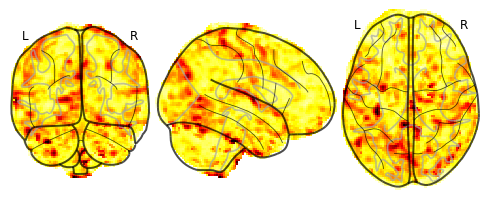

In [857]:
plot_glass_brain(mean_img(N_path8))